# Do household factors significantly impact education achievement?
### Amogh Giri, Ian Yeh, Rivke Weingarten

## Data Collection

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/Amgg12301/CMSC320-Final/main/county_complete.csv")
data

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,37613.0,43806,44013.0,45042.0,45145.0,44981.0,44732.0,...,NaN,2.3,5.7,11.3,0.5,9.2,13.8,8.6,93.4,79.6
3138,56039,Wyoming,Teton County,18251.0,21294,21476.0,21709.0,22326.0,22817.0,23029.0,...,NaN,0.7,0.7,12.7,0.0,10.1,5.9,5.3,89.3,81.3
3139,56041,Wyoming,Uinta County,19742.0,21118,20899.0,20999.0,20960.0,20845.0,20780.0,...,NaN,3.5,5.5,11.2,0.6,6.8,1.8,7.4,93.4,87.5
3140,56043,Wyoming,Washakie County,8289.0,8533,8460.0,8421.0,8427.0,8288.0,8296.0,...,NaN,3.8,4.1,15.0,1.5,7.0,7.8,11.9,89.7,81.9


In [45]:
df = county_data[["fips", "state", "name", "median_household_income_2017", "bachelors_2017", "hs_grad_2017", "computer_2017"]]
df

,fips,state,name,median_household_income_2017,bachelors_2017,hs_grad_2017,computer_2017
0,1001,Alabama,Autauga County,55317.0,25.0,87.7,86.2
1,1003,Alabama,Baldwin County,52562.0,30.7,90.2,86.9
2,1005,Alabama,Barbour County,33368.0,12.0,73.1,73.4
3,1007,Alabama,Bibb County,43404.0,13.2,82.1,74.8
4,1009,Alabama,Blount County,47412.0,13.1,79.8,78.2
...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,71083.0,22.2,91.3,92.1
3138,56039,Wyoming,Teton County,80049.0,54.1,95.1,95.4
3139,56041,Wyoming,Uinta County,54672.0,17.4,91.8,91.2
3140,56043,Wyoming,Washakie County,51362.0,21.0,88.5,87.7


In [55]:
temp_average_income = round(df['median_household_income_2017'].sum() / len(df['median_household_income_2017']), 0)
temp_average_computer = round(df['computer_2017'].sum() / len(df['computer_2017']), 0)
temp_average_bachelors = round(df['bachelors_2017'].sum() / len(df['bachelors_2017']), 0)
temp_average_hs_grad = round(df['hs_grad_2017'].sum() / len(df['hs_grad_2017']), 0)

for index, row in county_data.iterrows():
    if np.isnan(row['median_household_income_2017']):
        df.loc[index, 'median_household_income_2017'] = temp_average_income

    if np.isnan(row['computer_2017']):
        df.loc[index, 'computer_2017'] = temp_average_computer

    if np.isnan(row['bachelors_2017']):
        df.loc[index, 'bachelors_2017'] = temp_average_bachelors

    if np.isnan(row['hs_grad_2017']):
        df.loc[index, 'hs_grad_2017'] = temp_average_hs_grad

print(df['median_household_income_2017'].isnull().values.any())
print(df['computer_2017'].isnull().values.any())
print(df['bachelors_2017'].isnull().values.any())
print(df['hs_grad_2017'].isnull().values.any())

False
False
False
False


## Data Analysis & Visualization

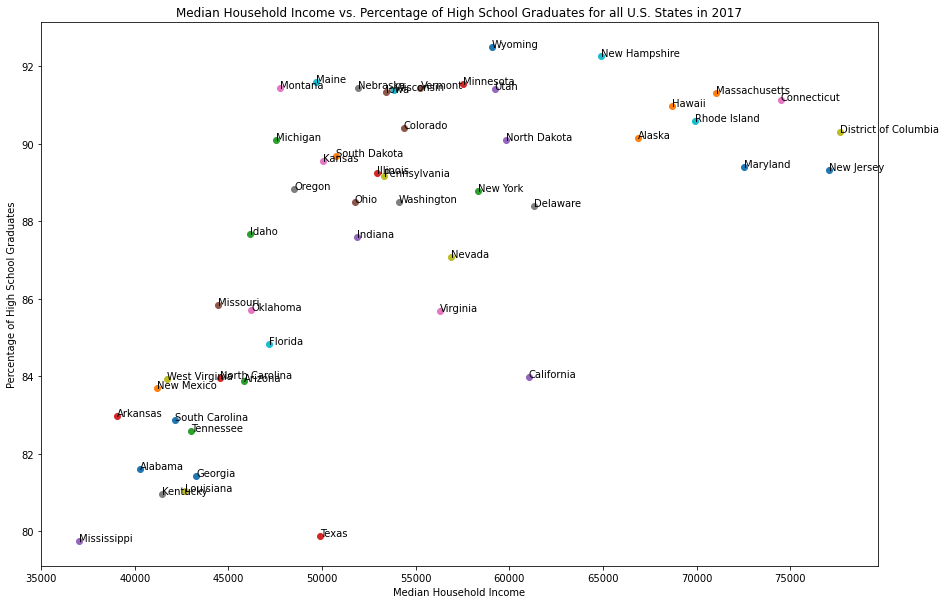

In [56]:
from sklearn.linear_model import LinearRegression

states = df['state'].unique()
plt.figure(figsize=(15,10))

for state in states:
    average_income = df[df.state == state]['median_household_income_2017']
    average_income = average_income.sum() / len(average_income)

    average_hs_grad = df[df.state == state]['hs_grad_2017']
    average_hs_grad = average_hs_grad.sum() / len(average_hs_grad)

    plt.scatter(average_income, average_hs_grad)
    plt.annotate(state, (average_income, average_hs_grad))

plt.title('Median Household Income vs. Percentage of High School Graduates for all U.S. States in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School Graduates')
plt.show()

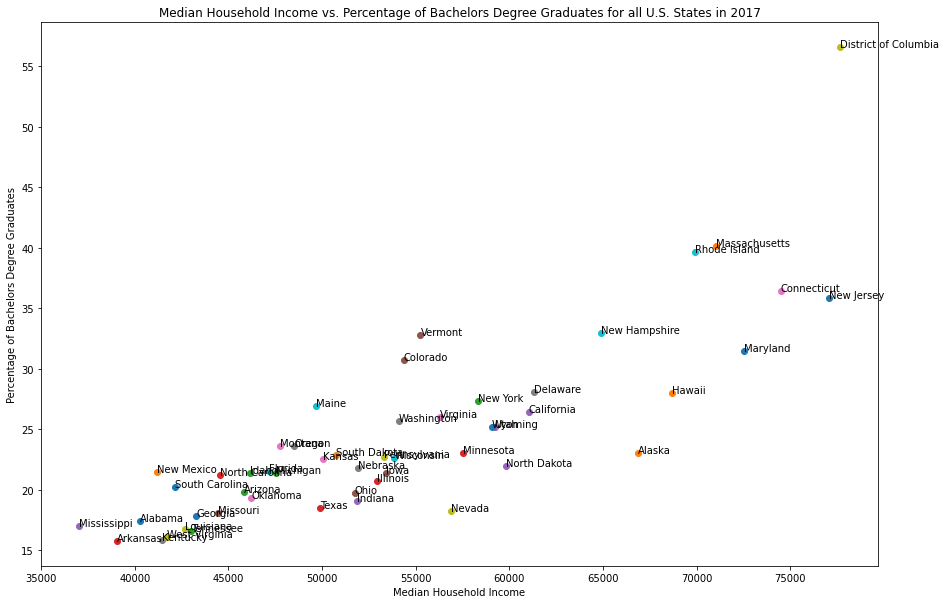

In [57]:
plt.figure(figsize=(15,10))

for state in states:
    average_income = df[df.state == state]['median_household_income_2017']
    average_income = average_income.sum() / len(average_income)

    average_bachelors = df[df.state == state]['bachelors_2017']
    average_bachelors = average_bachelors.sum() / len(average_bachelors)

    plt.scatter(average_income, average_bachelors)
    plt.annotate(state, (average_income, average_bachelors))

plt.title('Median Household Income vs. Percentage of Bachelors Degree Graduates for all U.S. States in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Bachelors Degree Graduates')
plt.show()

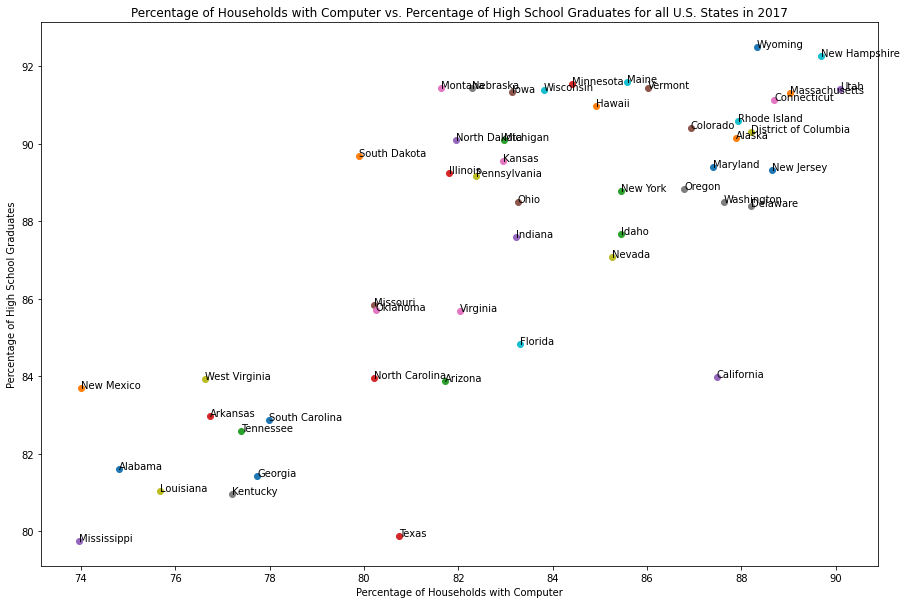

In [58]:
plt.figure(figsize=(15,10))

for state in states:
    average_computer = df[df.state == state]['computer_2017']
    average_computer = average_computer.sum() / len(average_computer)

    average_hs_grad = df[df.state == state]['hs_grad_2017']
    average_hs_grad = average_hs_grad.sum() / len(average_hs_grad)

    plt.scatter(average_computer, average_hs_grad)
    plt.annotate(state, (average_computer, average_hs_grad))

plt.title('Percentage of Households with Computer vs. Percentage of High School Graduates for all U.S. States in 2017')
plt.xlabel('Percentage of Households with Computer')
plt.ylabel('Percentage of High School Graduates')
plt.show()

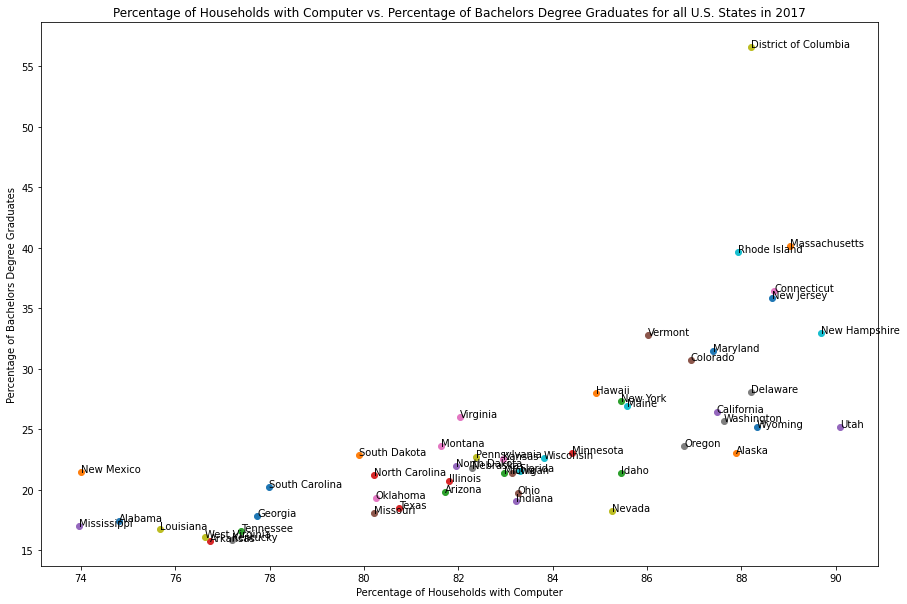

In [59]:
plt.figure(figsize=(15,10))

for state in states:
    average_computer = df[df.state == state]['computer_2017']
    average_computer = average_computer.sum() / len(average_computer)

    average_bachelors = df[df.state == state]['bachelors_2017']
    average_bachelors = average_bachelors.sum() / len(average_bachelors)

    plt.scatter(average_computer, average_bachelors)
    plt.annotate(state, (average_computer, average_bachelors))

plt.title('Percentage of Households with Computer vs. Percentage of Bachelors Degree Graduates for all U.S. States in 2017')
plt.xlabel('Percentage of Households with Computer')
plt.ylabel('Percentage of Bachelors Degree Graduates')
plt.show()

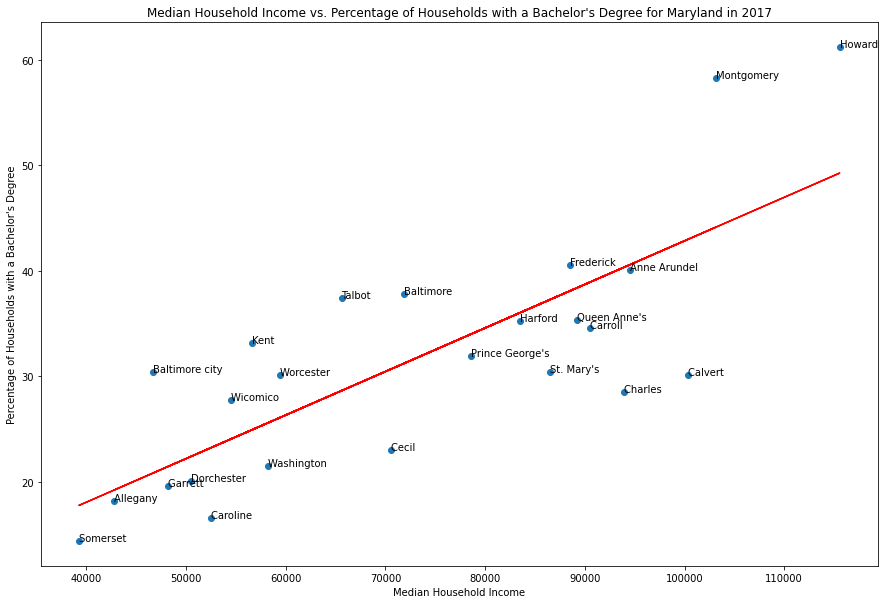

In [68]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))
plt.scatter(state['median_household_income_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with a Bachelor\'s Degree for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with a Bachelor\'s Degree')
plt.show()

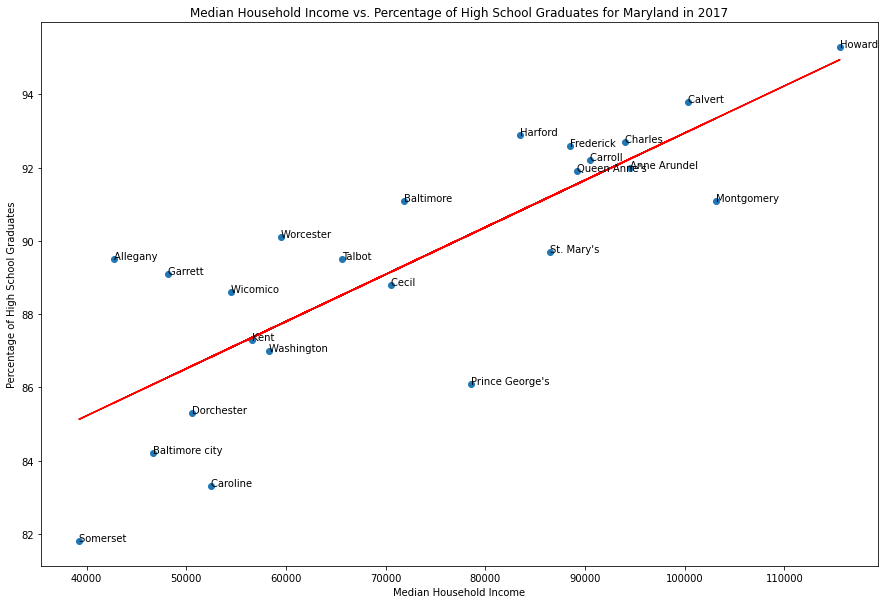

In [69]:
plt.figure(figsize=(15,10))
plt.scatter(state['median_household_income_2017'], state['hs_grad_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['hs_grad_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['hs_grad_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of High School Graduates for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School Graduates')
plt.show()

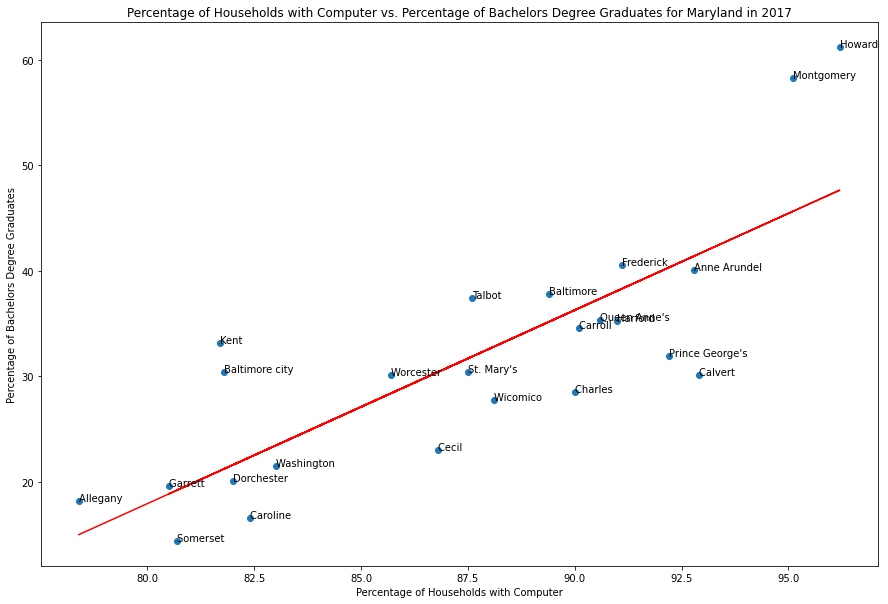

In [70]:
plt.figure(figsize=(15,10))
plt.scatter(state['computer_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['computer_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['computer_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['computer_2017'].to_numpy().reshape(-1,1))
plt.plot(state['computer_2017'], predictions, 'r')

plt.title('Percentage of Households with Computer vs. Percentage of Bachelors Degree Graduates for Maryland in 2017')
plt.xlabel('Percentage of Households with Computer')
plt.ylabel('Percentage of Bachelors Degree Graduates')
plt.show()

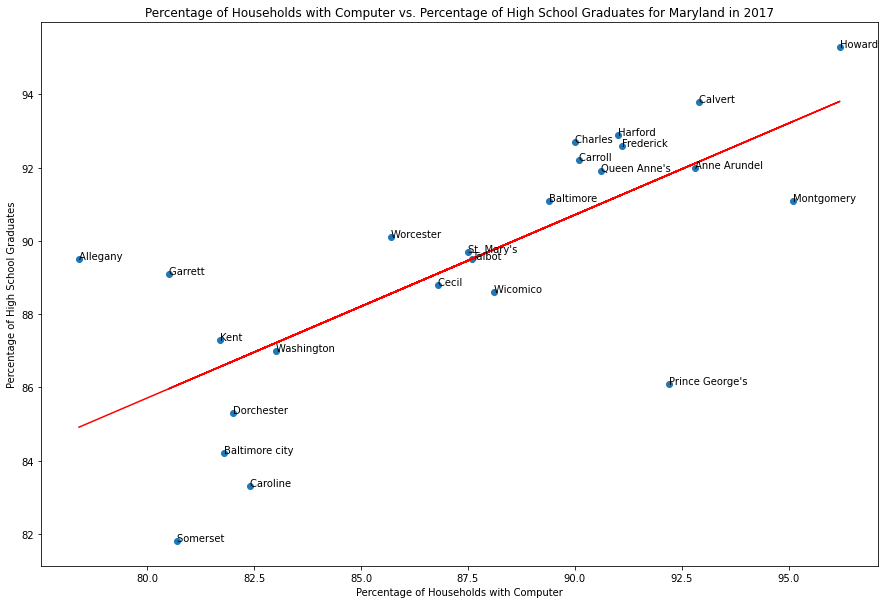

In [71]:
plt.figure(figsize=(15,10))
plt.scatter(state['computer_2017'], state['hs_grad_2017'])

for county in state['name']:
    x = state[state.name == county]['computer_2017']
    y = state[state.name == county]['hs_grad_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['computer_2017'].to_numpy().reshape(-1,1), state['hs_grad_2017']) 
predictions = regr.predict(state['computer_2017'].to_numpy().reshape(-1,1))
plt.plot(state['computer_2017'], predictions, 'r')

plt.title('Percentage of Households with Computer vs. Percentage of High School Graduates for Maryland in 2017')
plt.xlabel('Percentage of Households with Computer')
plt.ylabel('Percentage of High School Graduates')
plt.show()

## Hypothesis Testing

In [72]:
y = state_data['hs_grad_2017']
x = state_data['median_household_income_2017']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           hs_grad_2017   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     41.37
Date:                Sat, 15 May 2021   Prob (F-statistic):           1.80e-06
Time:                        01:06:32   Log-Likelihood:                -50.655
No. Observations:                  24   AIC:                             105.3
Df Residuals:                      22   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           80.0756      1.513     52.935      0.000      76.938      83.213
median_household_income_2017     0.0001      2e-05      6.432      0.000    8.72e-05       0.000
==============================================================================
Omnibus:                        0.493   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.544
Skew:                          -0.292   Prob(JB):                        0.762
Kurtosis:                       2.549   Cond. No.                     2.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
y = state_data['bachelors_2017']
x = state_data['median_household_income_2017']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bachelors_2017   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     34.26
Date:                Sat, 15 May 2021   Prob (F-statistic):           6.86e-06
Time:                        01:06:33   Log-Likelihood:                -80.864
No. Observations:                  24   AIC:                             165.7
Df Residuals:                      22   BIC:                             168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.5924      5.326      0.299      0.768      -9.453      12.638
median_household_income_2017     0.0004   7.05e-05      5.854      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.547   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.649
Skew:                           0.234   Prob(JB):                        0.723
Kurtosis:                       2.344   Cond. No.                     2.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
y = state_data['hs_grad_2017']
x = state_data['computer_2017']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           hs_grad_2017   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     25.21
Date:                Sat, 15 May 2021   Prob (F-statistic):           5.01e-05
Time:                        01:06:35   Log-Likelihood:                -54.190
No. Observations:                  24   AIC:                             112.4
Df Residuals:                      22   BIC:                             114.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.7066      8.719      5.242      0.000      27.623      63.790
computer_2017     0.5001      0.100      5.020      0.000       0.293       0.707
==============================================================================
Omnibus:                        2.668   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.537
Skew:                          -0.610   Prob(JB):                        0.464
Kurtosis:                       3.222   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
y = state_data['bachelors_2017']
x = state_data['computer_2017']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bachelors_2017   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     41.19
Date:                Sat, 15 May 2021   Prob (F-statistic):           1.86e-06
Time:                        01:06:39   Log-Likelihood:                -79.472
No. Observations:                  24   AIC:                             162.9
Df Residuals:                      22   BIC:                             165.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -128.6909     25.002     -5.147      0.000    -180.543     -76.839
computer_2017     1.8329      0.286      6.418      0.000       1.241       2.425
==============================================================================
Omnibus:                        1.638   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.369
Skew:                           0.550   Prob(JB):                        0.504
Kurtosis:                       2.601   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""